In [ ]:
!unzip "/content/drive/MyDrive/train-20230310T230209Z-001.zip"

Archive:  /content/drive/MyDrive/train-20230310T230209Z-001.zip
  inflating: train/dog.9171.jpg      
  inflating: train/dog.9071.jpg      
  inflating: train/dog.9316.jpg      
  inflating: train/dog.9874.jpg      
  inflating: train/dog.9410.jpg      
  inflating: train/dog.894.jpg       
  inflating: train/dog.962.jpg       
  inflating: train/dog.9069.jpg      
  inflating: train/dog.9017.jpg      
  inflating: train/dog.9559.jpg      
  inflating: train/dog.8953.jpg      
  inflating: train/dog.9200.jpg      
  inflating: train/dog.9773.jpg      
  inflating: train/dog.9334.jpg      
  inflating: train/dog.8503.jpg      
  inflating: train/dog.9800.jpg      
  inflating: train/dog.9751.jpg      
  inflating: train/dog.8533.jpg      
  inflating: train/dog.9373.jpg      
  inflating: train/dog.9274.jpg      
  inflating: train/dog.8733.jpg      
  inflating: train/dog.8699.jpg      
  inflating: train/dog.9113.jpg      
  inflating: train/dog.9466.jpg      
  inflating: train/dog.8

In [ ]:
from PIL import Image

# Load the image
image = Image.open("/content/train/cat.11471.jpg")

# Print the dimensions
print("Number of channels:", len(image.getbands()))
print("Width:", image.width)
print("Height:", image.height)


Number of channels: 3
Width: 180
Height: 104


Lowest pixel width: 101
Lowest pixel height: 65
/content/train/dog.4113.jpg


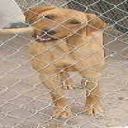

128
128


In [ ]:

import os

# Set the path to the folder containing the images
folder_path = "/content/train"

# Initialize variables to hold the lowest pixel width and height and the corresponding image
lowest_width = float("inf")
lowest_height = float("inf")
lowest_image_path = ""

# Iterate over all the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)

        # Check if the image has the lowest width or height so far
        if image.width < lowest_width:
            lowest_width = image.width
            lowest_image_path = image_path
        if image.height < lowest_height:
            lowest_height = image.height
            lowest_image_path = image_path

# Print the lowest pixel width and height
print("Lowest pixel width:", lowest_width)
print("Lowest pixel height:", lowest_height)

# Load and show the image with the lowest dimensions
lowest_image = Image.open(lowest_image_path)
print(lowest_image_path)
# Resize the image to 128x128
resized_image = lowest_image.resize((128, 128))

# Show the resized image
resized_image.show()
print(resized_image.width)
print(resized_image.height)

#lowest_image.show()


In [ ]:

import os

# Set the path to the folder containing the original images
folder_path = "/content/test_data"

# Set the path to the new folder for the resized images
new_folder_path = "new_test"

# Create the new folder if it doesn't exist
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

# Iterate over all the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)

        # Resize the image to 256x256
        resized_image = image.resize((256, 256))

        # Save the resized image to the new folder
        new_image_path = os.path.join(new_folder_path, filename)
        resized_image.save(new_image_path)


In [ ]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms

# Define the dataset
dataset = torchvision.datasets.ImageFolder(root='/content/data', transform = transforms.Compose([
                transforms.ToTensor()
            ])
)

# Define the data loader
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)



In [ ]:

import torch.nn.functional as F

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.enc1 = nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1)
        self.enc2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.enc3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.enc4 = nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1)

        # Decoder
        self.dec1 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.dec2 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.dec3 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.dec4 = nn.ConvTranspose2d(32, 3, kernel_size=3, stride=2, padding=1, output_padding=1)

    def forward(self, x):
        # Encoder
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.enc3(x))
        x = F.relu(self.enc4(x))

        # Decoder
        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        x = F.relu(self.dec3(x))
        x = torch.sigmoid(self.dec4(x))

        return x



# Create an instance of the autoencoder network
autoencoder = Autoencoder()


In [ ]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)


In [ ]:
# Train the autoencoder
num_epochs = 10



for epoch in range(num_epochs):
    for data in data_loader:
        img, _ = data
        target_size = (256, 256)
        img_resized = F.interpolate(img, size=target_size, mode='bilinear', align_corners=False)
        optimizer.zero_grad()
        recon = autoencoder(img_resized)
        loss = criterion(recon, img_resized)
        loss.backward()
        optimizer.step()


In [ ]:
# Load the image
image = Image.open('/content/ataturk.png')

# Resize the image to 256x256
image = image.resize((256, 256))

# Save the resized image to a file
image.save('test.png')

In [ ]:
test = torchvision.datasets.ImageFolder(root='/content/data2', transform = transforms.Compose([                transforms.ToTensor()            ])
)

# Evaluate the performance of the model on a test dataset
test_loader = DataLoader(dataset=test, batch_size=64, shuffle=True)

total_mse = 0.0
num_samples = 0

with torch.no_grad():
    for data in test_loader:
        img, _ = data
        target_size = (256, 256)
        img_resized = F.interpolate(img, size=target_size, mode='bilinear', align_corners=False)
        recon = autoencoder(img_resized)
        mse = F.mse_loss(recon, img_resized, reduction='sum')
        total_mse += mse.item()
        num_samples += img.size(0)

avg_mse = total_mse / num_samples
print(f"Average MSE on the test dataset: {avg_mse:.4f}")


Average MSE on the test dataset: 1273.0341


In [ ]:
import os
import numpy as np
import cv2

# Specify the directory containing the images
input_dir = '/content/data/new_train'

# Specify the directory where the augmented images will be saved
output_dir = '/content/test_data'

# Define the augmentations
augmentations = [
    ('zoom_in_10', lambda img: cv2.resize(img, None, fx=1.1, fy=1.1)),
    ('zoom_out_10', lambda img: cv2.resize(img, None, fx=0.9, fy=0.9)),
    ('zoom_in_20', lambda img: cv2.resize(img, None, fx=1.2, fy=1.2)),
    ('shift_north', lambda img: cv2.warpAffine(img, np.float32([[1, 0, 0], [0, 1, -0.1 * img.shape[0]]]), img.shape[:2])),
    ('shift_south', lambda img: cv2.warpAffine(img, np.float32([[1, 0, 0], [0, 1, 0.1 * img.shape[0]]]), img.shape[:2])),
    ('shift_east', lambda img: cv2.warpAffine(img, np.float32([[1, 0, -0.1 * img.shape[1]], [0, 1, 0]]), img.shape[:2])),
    ('shift_west', lambda img: cv2.warpAffine(img, np.float32([[1, 0, 0.1 * img.shape[1]], [0, 1, 0]]), img.shape[:2])),
    ('shift_northwest', lambda img: cv2.warpAffine(img, np.float32([[1, 0, 0.1 * img.shape[1]], [0, 1, -0.1 * img.shape[0]]]), img.shape[:2])),
    ('shift_northeast', lambda img: cv2.warpAffine(img, np.float32([[1, 0, -0.1 * img.shape[1]], [0, 1, -0.1 * img.shape[0]]]), img.shape[:2])),
    ('shift_southeast', lambda img: cv2.warpAffine(img, np.float32([[1, 0, -0.1 * img.shape[1]], [0, 1, 0.1 * img.shape[0]]]), img.shape[:2])),
    ('shift_southwest', lambda img: cv2.warpAffine(img, np.float32([[1, 0, 0.1 * img.shape[1]], [0, 1, 0.1 * img.shape[0]]]), img.shape[:2])),
    ('horizontal_flip', lambda img: cv2.flip(img, 1))
]

# Loop through the images in the input directory
for filename in os.listdir(input_dir):
    # Read the image
    img = cv2.imread(os.path.join(input_dir, filename))

    # Apply the augmentations and save the variations
    for aug_name, aug_func in augmentations:
        aug_image = aug_func(img)
        output_filename = f'{os.path.splitext(filename)[0]}_{aug_name}.jpg'
        output_path = os.path.join(output_dir, output_filename)
        cv2.imwrite(output_path, aug_image)

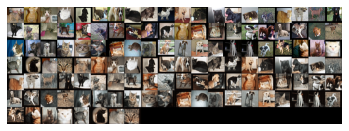

In [ ]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Get a batch of images from the test loader
images, _ = next(iter(test_loader))

# Resize the images
target_size = (256, 256)
images_resized = F.interpolate(images, size=target_size, mode='bilinear', align_corners=False)

# Pass the resized images through the autoencoder to get the reconstructed images
recon = autoencoder(images_resized)

# Create a grid of images to visualize the results
grid = vutils.make_grid(torch.cat([images, recon], dim=0), nrow=20, normalize=True, scale_each=True)

# Plot the grid of images
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()


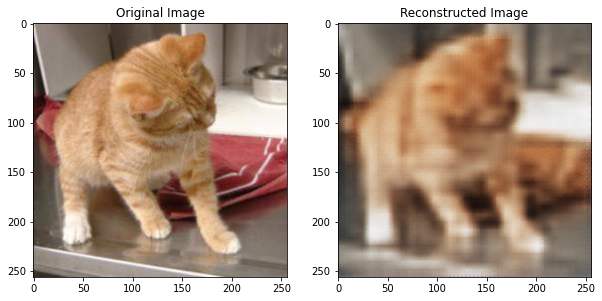

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select one image from the test dataset
image, _ = test[454]
target_size = (256, 256)
image_resized = F.interpolate(image.unsqueeze(0), size=target_size, mode='bilinear', align_corners=False)

# Pass the resized image through the autoencoder to get the reconstructed image
with torch.no_grad():
    recon = autoencoder(image_resized)

# Convert the image and reconstructed image to numpy arrays for display purposes
image_np = image.permute(1, 2, 0).numpy()
recon_np = recon.squeeze().permute(1, 2, 0).numpy()

# Plot the original image and reconstructed image side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_np)
ax[0].set_title('Original Image')
ax[1].imshow(recon_np)
ax[1].set_title('Reconstructed Image')
plt.show()
